<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m06/c2/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En este notebook vamos a desarrollar alguno ejemplos relativos a la metodología denominada árboles de decisión o decision trees.

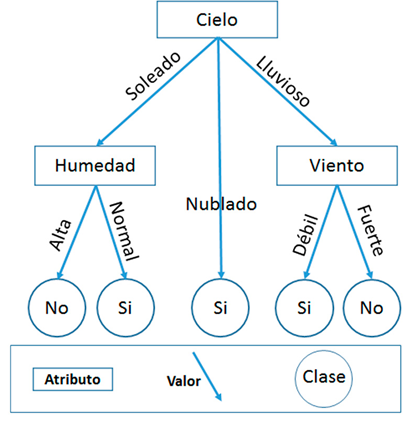

# Árboles de decisión para problemas de clasificación

## Ejemplo de predicción de casos de diabetes

Comenzamos utilizando el fichero diabetes.csv que lo podemos encontrar en [este enlace](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). 

El objetivo del conjunto de datos es predecir **si un paciente tiene o no diabetes**, basándonos en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones. En particular, todos los pacientes en nuestro conjunto de datos son mujeres de al menos 21 años de edad de un determinado origen.

El dataset consta de varias variables médicas predictoras o features y una variable target u objetivo (el resultado). Entre variables predictoras están el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

A continuación vamos a proceder a descargar los datos. Previamente es necesario importar algunas librerías de Python que vamos a emplear a lo largo del notebook.

In [1]:
# cargamos librerias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importamos el calsificador 
from sklearn.model_selection import train_test_split # Importamos función train_test_split 
from sklearn import metrics #Importamos métricas del módulo de scikit-learn para calcular lel accuracy del modelo
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Opción descargar datos de Google Drive

In [2]:
#Descargamos los ficheros de Google Drive
#https://drive.google.com/file/d/11gtaNBirzGcPncMfaaVzyS4IahWRizx0/view?usp=sharing
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=11gtaNBirzGcPncMfaaVzyS4IahWRizx0' -O 'diabetes.csv'

--2023-02-12 18:56:57--  https://drive.google.com/uc?export=download&id=11gtaNBirzGcPncMfaaVzyS4IahWRizx0
Resolving drive.google.com (drive.google.com)... 74.125.197.113, 74.125.197.139, 74.125.197.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7jti3891vn3q4i6q3m5hnr7ko5rpiqmr/1676228175000/14644984037434537262/*/11gtaNBirzGcPncMfaaVzyS4IahWRizx0?e=download&uuid=a625c358-78a4-40c9-8ce4-e62ce3a4de0e [following]
--2023-02-12 18:56:57--  https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7jti3891vn3q4i6q3m5hnr7ko5rpiqmr/1676228175000/14644984037434537262/*/11gtaNBirzGcPncMfaaVzyS4IahWRizx0?e=download&uuid=a625c358-78a4-40c9-8ce4-e62ce3a4de0e
Resolving doc-08-b0-docs.googleusercontent.com (doc-08-b0-docs.googleusercontent.com)... 74.125.135.132, 2607:

### Opción de descargar datos con Kaggle



Otra opción sería descargando los datos directamente de la API de Kaggle, pero para ello tendríamos que crearnos una cuenta en Kaggle, generar una clave (*Account > API > Create New API Token*) y subir el archivo *kaggle.json* resultante a nuestra cuenta de Google Drive.

A continuación incluyo un ejemplo de cómo se haría, aunque no lo vamos a emplear para este laboratorio.

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#! pip install kaggle
#! mkdir ~/.kaggle
#! cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json
#! chmod 600 ~/.kaggle/kaggle.json
##Buscamos la referencia al dataset que nos interesa
#!kaggle datasets list -s diabetes

In [5]:
#! kaggle datasets download uciml/pima-indians-diabetes-database
#! unzip pima-indians-diabetes-database.zip

### Lectura de datos y división en train/test

In [6]:
# Definimos previamente los nombres de la columnas
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# cargamos los datos
data = pd.read_csv("diabetes.csv", header=0, names=col_names)

In [7]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dividimos ahora el conjunto de datos de forma que, por un lado tengamos las variables independientes (features) y, por otro, la variable dependiente (target).

In [8]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols] # Features
y = data.label # Target variable

In [9]:
#Obtenemos una muestra de los datos y vemos que ya no está la variable 'label'
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288


In [10]:
# dividimos los datos en entrenamiento y test
# 70% de entrenamiento y 30% de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

### Ajuste del modelo y primeras predicciones

In [11]:
# Creamos el objeto de clasificación Decision Tree
clf = DecisionTreeClassifier()

# Ajustamos el conjunto de entrenamiento
clf = clf.fit(X_train,y_train)

#Creamos la predicción del conjunto test
y_pred = clf.predict(X_test)

In [12]:
# Calculamos el accuracy del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


Como vemos se ha obtenido un accuracy cercano al 67 %, lo que se puede considerar algo bajo. Posteriormente intentaremos modificar algún hiperparámetro para mejorar el valor del mismo.




### Obtención de la matriz de confusión y otras métricas relevantes
A continuación se muestra cómo calcular la matriz de confusión y presentar sus resultados en un formato más visual utilizando para ello la librería `matplotlib`.

In [13]:
# Obtenemos la matriz de confusión
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[112,  34],
       [ 42,  43]])

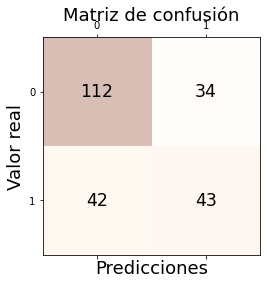

In [14]:
# Utilizamos matplotlib para obtener un versión estética de esta matriz de confusión
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4))
# Representamos la matriz de confusión como una matrix sombreada en función de los valores
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
# La matriz resultante no incluye los valores de cada celda, así que los imprimimos
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
# Añadimos los ejes y el título 
plt.xlabel('Predicciones', fontsize=18)
plt.ylabel('Valor real', fontsize=18)
plt.title('Matriz de confusión', fontsize=18)
plt.show()


A partir de la matriz de confusión, podemos obtener otras métricas que nos permiten evaluar las clasificaciones obtenidas por el modelo desde diferentes perspectivas. Éstas se obtienen con la clase `classification_report`.

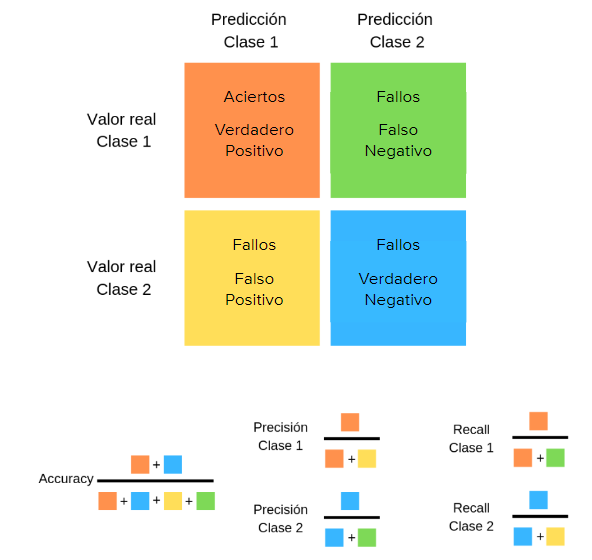

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       146
           1       0.56      0.51      0.53        85

    accuracy                           0.67       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.67      0.67      0.67       231



Más información: http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/


### Visualización del árbol creado

Podemos representar el árbol fácilmente con las siguientes instrucciones.

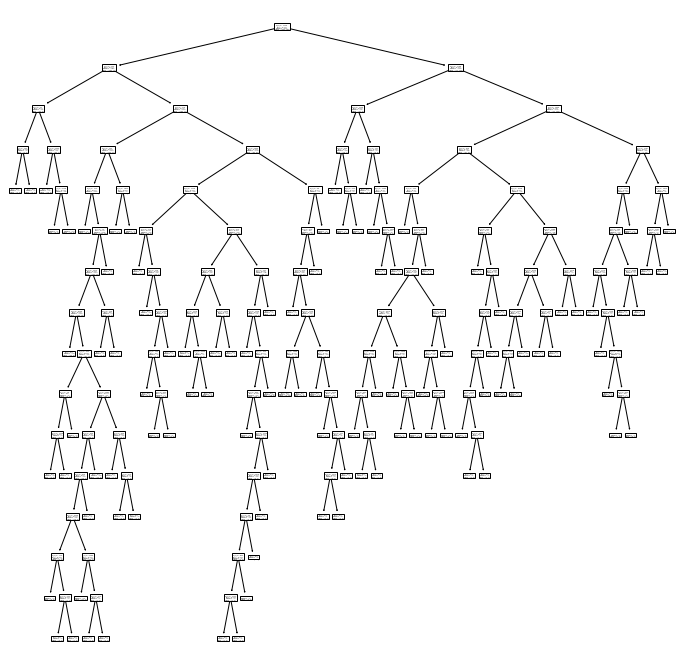

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12,12))
tree.plot_tree(clf);

Dado que el árbol no ha tenido **ningún tipo de poda**, éste ha crecido indefinidamente durante el proceso de entrenamiento, por lo que lo más probable es que tengamos un modelo sobreajustado. 

A consecuencia de este crecimiento sin control, el árbol resultante es tan extenso, y está compuesto por tantas reglas de decisión, que es imposible distinguir nada con la representación gráfica.



### Reducción del tamaño del árbol modificando los hiperparámetros del modelo.

Como se ha visto, el modelo anterior se ha creado sin especificar ningún tipo de hiperparámetro, por lo que se han tomado los valores que por defecto posee la clase `DecisionTreeClassifier()`. De esa forma, ya se ha visto que el ajuste del modelo era bastante pobre y, por lo tanto, habrá que buscar otros valores de los hiperparámetros, con la finalidad de localizar mejorar las métricas anteriores como accuracy, precisión, recall, etc.

Para conseguir ese ojetivo, vamos a especificar que el árbol de decisión sólo pueda llegar al nivel 3 de profundidad como máximo, con el parámetro `max_depth=3`.

In [17]:
# Creamos el objeto de clasificación
clf = DecisionTreeClassifier(max_depth=3)

# Ajustamos el árbol
clf = clf.fit(X_train,y_train)

#Predcimos los valores de test
y_pred = clf.predict(X_test)

# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


In [18]:
# Obtenemos la matriz de confusión
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[127,  19],
       [ 37,  48]])

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       146
           1       0.72      0.56      0.63        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



Como podemos observar, se **han mejorado los resultados** obtenidos por el árbol simplemente limitando el hiperparámetro `max_depth`, lo cual puede ser un indicador de que el anterior árbol efectivamente estaba memorizando en exceso los datos de entrenamiento.

Veamos a continuación la representación gráfica de este último ajuste. Este árbol, al tener limitada la profundidad máxima, será mucho más sencillo de interpretar a partir de su representación

#### Visualización del árbol de decisión con `export_graphviz`

Para mejorar la presentación del árbol de decisión, se puede utilizar la función `export_graphviz`. Entonces tendremos que instalar las librerías `graphviz` y `pydotplus`. Se puede hacer con los siguientes comandos del sistema operativo (recordad que en los notebook los comandos de sistema operativo tienen que ir precedidos de la excalmación '!')

*pip install graphviz*

*pip install pydotplus*


La función `export_graphviz` convierte el clasificador del árbol de decisión en un archivo dot y `pydotplus` convierte este archivo dot en png o en un formato que se pueda visualizar en el notebook. Veamos a continuación cómo se hace.

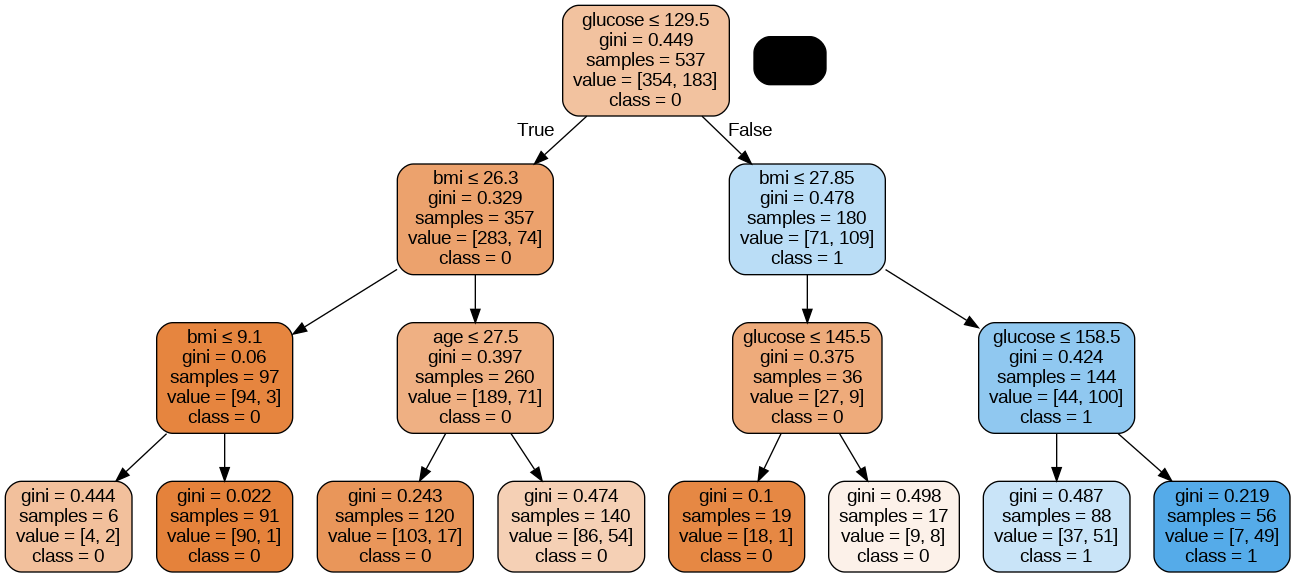

In [20]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

#### Visualización del árbol simplificado con `dtreeviz`

Otra forma de hacer esta representación consiste en utilizar la [librería dtreeviz](https://github.com/parrt/dtreeviz). Gracias a esta librería, una vez creado un árbol de decisión con `scikit-learn`, se pueden obtener interesantes visualizaciones de los árboles de decisión ya entrenados.

Esta librería se puede emplear para visualizar tanto árboles para clasificación como para regresión. En este caso vamos a estudiar su aplicación para los problemas de clasificación.

In [21]:
#Si no tenéis instalado la librería dtreeviz descomentad el siguiente comando
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
! pip show dtreeviz

Name: dtreeviz
Version: 2.1.4
Summary: A Python 3 library for sci-kit learn, XGBoost, LightGBM, Spark, and TensorFlow decision tree visualization
Home-page: https://github.com/parrt/dtreeviz
Author: Terence Parr, Tudor Lapusan, and Prince Grover
Author-email: parrt@antlr.org
License: MIT
Location: /usr/local/lib/python3.8/dist-packages
Requires: colour, graphviz, matplotlib, numpy, pandas, pytest, scikit-learn
Required-by: 


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


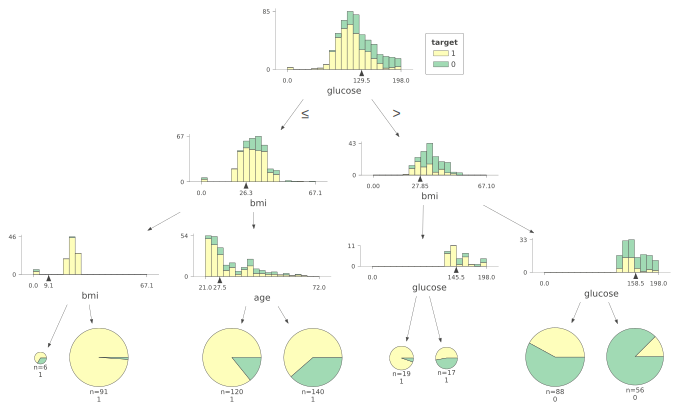

In [23]:
import dtreeviz
# from dtreeviz.trees import dtreeviz # Cargamos el paquete

# Creamos el objeto de clasifiacción
clf = DecisionTreeClassifier(max_depth=3)

# Ajustamos el árbol
clf = clf.fit(X_train.values,y_train.values)

viz = dtreeviz.model(clf, 
               X_train.values,
               y_train.values,
               target_name='target',
               feature_names=X_train.columns, 
               class_names=["1","0"]  # necesario class_names para el clasificador
              ) 

viz.view()

### Ejercicio 

Vemos que los resultados han mejorado simplemente especificando una profundidad máxima del árbol. ¿Serías capaz de seguir mejorando estos resultado incluyendo algún otro hiperparámetro? Incluso puedes utilizar [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) como guía para encontrar la mejor combinación de los mismos.

Comenta en el foro qué conjunto de hiperparámetros te ha dado el mejor resultado, así como, las combinaciones que has probado.

In [24]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [25]:
# Nos guardaremos los mejores hiperparámetros para no tener que ejecutar 
#   esto varias veces

# n_features = len(X.columns)

# from sklearn.model_selection import GridSearchCV

# grid = GridSearchCV(
#     estimator=DecisionTreeClassifier(),
#     scoring="accuracy",
#     n_jobs=-1,
#     cv=3,
#     return_train_score=True,
#     param_grid=dict(
#         criterion=["gini", "entropy"],
#         max_depth=range(2,10),
#         max_features=range(3, n_features),
#         min_samples_leaf=range(1, 10),
#         min_samples_split=range(2,10),
#     )
# )
# grid.fit(X=X_train, y=y_train)

# print(grid.best_params_)
# print(grid.best_estimator_)

In [26]:
# Nos guardamos los mejores hiperparámetros para no tener que ejecutar otra vez el Grid Search
best_params = {'criterion': 'gini', 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 6, 'min_samples_split': 5}

In [27]:
clf = DecisionTreeClassifier(**best_params,splitter="best")
print(clf)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("\nConfusion Matrix")
print(conf_matrix)
print("\nClassification Report")
print(classification_report(y_test,y_pred))

DecisionTreeClassifier(max_depth=6, max_features=3, min_samples_leaf=6,
                       min_samples_split=5)

Accuracy: 0.7402597402597403

Confusion Matrix
[[120  26]
 [ 34  51]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       146
           1       0.66      0.60      0.63        85

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



## Ejemplo para predecir si se puede jugar o no al tenis.

Obtenemos el dataset de https://www.kaggle.com/datasets/fredericobreno/play-tennis. Se trata de un conjunto de datos muy utilizado dentro del ámbito de la docencia de los árboles de decisión.

Es un juego de datos muy reducido, pero se ha creído conveniente introducir este ajemplo para que el alumno conozca un posible procedimiento a seguir, cuando se tengan datos que **no sean numéricos**, ya que en estos casos y tal y como está implementado *scikit-learn* en estos momentos, no se podrían procesar.

In [97]:
#Descargamos los ficheros de Google Drive
#https://drive.google.com/file/d/1E16elSkCQNZj13ptsXWy-JeOtz_FGEQd/view?usp=sharing
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1E16elSkCQNZj13ptsXWy-JeOtz_FGEQd' -O 'play_tennis.csv'

--2023-02-12 19:03:05--  https://drive.google.com/uc?export=download&id=1E16elSkCQNZj13ptsXWy-JeOtz_FGEQd
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.138, 74.125.195.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s0153uaem4obr7lt3044mtgedav3bh4b/1676228550000/14644984037434537262/*/1E16elSkCQNZj13ptsXWy-JeOtz_FGEQd?e=download&uuid=4c680d9d-da6f-4689-9e83-0ae2d6d781f8 [following]
--2023-02-12 19:03:06--  https://doc-0s-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s0153uaem4obr7lt3044mtgedav3bh4b/1676228550000/14644984037434537262/*/1E16elSkCQNZj13ptsXWy-JeOtz_FGEQd?e=download&uuid=4c680d9d-da6f-4689-9e83-0ae2d6d781f8
Resolving doc-0s-b0-docs.googleusercontent.com (doc-0s-b0-docs.googleusercontent.com)... 74.125.135.132, 2607:

In [111]:
# leemos los datos
data = pd.read_csv("play_tennis.csv", sep=",")
print(len(data))
data.head()

14


,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


El ejemplo es muy sencillo y de lo que se trata es de decidir si se juega o no en base a determinadas variables que nos informan sobre diferentes aspectos meteorológicos.

Como podemos observar, todas las variables son de tipo categórico cuyos valores son literales. Si queremos aplicar el clasificador del árbol de decisión y ajustarlo a los datos empleando la implementación de *scikit-learn*, primero tenemos que hacer las siguientes modificaciones a los datos, es decir, transformar los valores de tipo literal a formato numérico que represente estas categorías. 

In [112]:
# codificamos los datos en formato numérico
from sklearn import preprocessing
#Codificamos las variables explicativas (features)
feature_string_to_int= preprocessing.OrdinalEncoder()     
#Ajustamos el encoder de las features
feature_string_to_int.fit(data.loc[:, data.columns != "play"])    

#codificamos la variable a predecir (label)
label_string_to_int= preprocessing.LabelEncoder()     

#Hacemos una copia de los datos ya que queremos mantener los datos originales sin modificar
# No es necesario transformar la variable objetivo.
# data['play'] = data[['play']].apply(label_string_to_int.fit_transform)
data.loc[:, data.columns != "play"] = feature_string_to_int.transform(data.loc[:, data.columns != "play"])
data

,day,outlook,temp,humidity,wind,play
0,0.0,2.0,1.0,0.0,1.0,No
1,6.0,2.0,1.0,0.0,0.0,No
2,7.0,0.0,1.0,0.0,1.0,Yes
3,8.0,1.0,2.0,0.0,1.0,Yes
4,9.0,1.0,0.0,1.0,1.0,Yes
5,10.0,1.0,0.0,1.0,0.0,No
6,11.0,0.0,0.0,1.0,0.0,Yes
7,12.0,2.0,2.0,0.0,1.0,No
8,13.0,2.0,0.0,1.0,1.0,Yes
9,1.0,1.0,2.0,1.0,1.0,Yes


In [31]:
## Forma más sencilla de codificar los datos en formato numérico  pero sin hacer caso a la documentación
# ya que LabelEncoder() debería emplearse solo para la variable a predecir
#from sklearn import preprocessing
#label_string_to_int= preprocessing.LabelEncoder()     #codificamos la variable a predecir (label)
#data = data.apply(label_string_to_int.fit_transform)
#data

In [113]:
#Dividimos los datos en train y test
feature_cols = ['outlook','temp','humidity','wind']
X = data[feature_cols ]   #Nos quedamos con las features
y = data.play  #Nos quedamos con los traget o labels

In [115]:
#Dividimos en train test:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [116]:
# Hacemos el ajuste
from sklearn.tree import DecisionTreeClassifier                             
classifier =DecisionTreeClassifier(random_state=100)     # clasificador
classifier.fit(X_train, y_train)                 # ajustamos modelo

DecisionTreeClassifier(random_state=100)

In [117]:
#Predecimos la respuesta de los datos
y_pred= classifier.predict(X_test) 
y_pred

array(['No', 'Yes', 'Yes', 'Yes', 'No'], dtype=object)

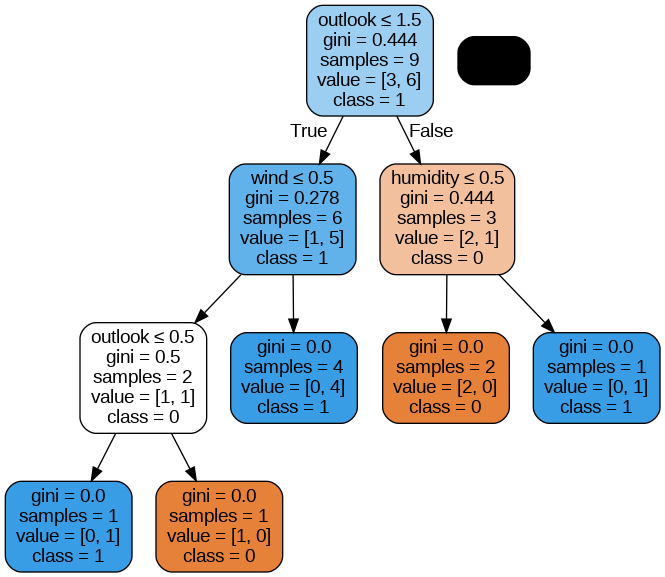

In [118]:
# Visualicemos el modelo
value= ['outlook','temp','humidity','wind']

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =value,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())

Otra posibilidad que tenemos con este predictor, es que podemos obtener la probabilidad de que una observación pertenezca a una otra categoría, lo que  permitiría al investigador definir el punto de corte ([Threshold](https://deepchecks.com/glossary/classification-threshold/) ) para mejorar la clasificación final del modelo.

In [119]:
y_pred_prob= classifier.predict_proba(X_test)
y_pred_prob

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

## Otro ejemplo de clasificador

Los datos se pueden obtener en [este enlace](https://archive.ics.uci.edu/ml/datasets/balance+scale). 

Este conjunto de datos se generó para modelar resultados experimentales psicológicos. Cada observación  se clasifica en tener la punta de la balanza hacia la derecha, hacia la izquierda o estar equilibrada. Los atributos o features son  left weight,  left distance,  right weight, y right distance.

La forma correcta de encontrar la clase es el mayor de (distancia a la izquierda * peso a la izquierda) y (distancia a la derecha * peso a la derecha). Si son iguales, está equilibrado.

In [38]:
import numpy as np
import pandas as pd

In [39]:
#Descargamos los ficheros de Google Drive
#https://drive.google.com/file/d/1vuLLe471pCsPNWeQdRFq5nJXW9O14NOC/view?usp=sharing
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1vuLLe471pCsPNWeQdRFq5nJXW9O14NOC' -O 'balance-scale.data'

--2023-02-12 18:57:27--  https://drive.google.com/uc?export=download&id=1vuLLe471pCsPNWeQdRFq5nJXW9O14NOC
Resolving drive.google.com (drive.google.com)... 74.125.197.139, 74.125.197.100, 74.125.197.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cob01kpvluv21eatuueeoj2u5tcs3n4l/1676228175000/14644984037434537262/*/1vuLLe471pCsPNWeQdRFq5nJXW9O14NOC?e=download&uuid=b1e87987-63c2-40e8-9f35-782bf07495b7 [following]
--2023-02-12 18:57:27--  https://doc-14-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cob01kpvluv21eatuueeoj2u5tcs3n4l/1676228175000/14644984037434537262/*/1vuLLe471pCsPNWeQdRFq5nJXW9O14NOC?e=download&uuid=b1e87987-63c2-40e8-9f35-782bf07495b7
Resolving doc-14-b0-docs.googleusercontent.com (doc-14-b0-docs.googleusercontent.com)... 74.125.135.132, 2607:

In [40]:
col = [ 'Class Name','Left weight','Left distance','Right weight','Right distance']
df = pd.read_csv('balance-scale.data',names=col,sep=',')
df.head()

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [41]:
# valores del clasificador 
df['Class Name'].unique()

array(['B', 'R', 'L'], dtype=object)

In [42]:
df['Class Name'].value_counts()

R    288
L    288
B     49
Name: Class Name, dtype: int64

Vemos que los datos están mal balanceados, entonces en esta ocasión y a efectos didácticos, lo que vamos a hacer es quedarnos solo con los valores que si están balanceados, es decir, todos aquellos registros que en la clase tienen un valor distinto a 'B'

In [43]:
df = df.loc[df['Class Name'] != 'B',:]
df['Class Name'].value_counts()

R    288
L    288
Name: Class Name, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 1 to 623
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      576 non-null    object
 1   Left weight     576 non-null    int64 
 2   Left distance   576 non-null    int64 
 3   Right weight    576 non-null    int64 
 4   Right distance  576 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 27.0+ KB


In [45]:
# Creamos los datos train test
from sklearn.model_selection import train_test_split
X = df.drop('Class Name',axis=1)
y = df[['Class Name']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [47]:
# Si queremos hacer una predicción de una observación predeterminada
clf_model.predict([[1,2,2,2]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


array(['R'], dtype=object)

Como resultado de ejecutar la celda anterior podemos observar que  obtenemos una advertencia o warning, a la cual inicialmente no hay que darle la mayor importancia, pues el problema radica en que no se les ha asignado a las variables explicativas ningún nombre. Para evitar esa advertencia, podemos actuar de la siguiente manera.

In [48]:
datos = pd.DataFrame([[1,2,2,2]],columns=X_train.columns)
clf_model.predict(datos)

array(['R'], dtype=object)

También se pueden predecir probabilidades de que una nueva observación pertenezca a una u otra clase

In [49]:
clf_model.predict_proba(pd.DataFrame([[1,2,2,2]],columns=X_train.columns))

array([[0.47826087, 0.52173913]])

A continuación procedemos a realizar la predicción de todos los valores que hemos dejado en el conjunto de test anteriormente. Es decir, obtenemos las predicciones para un conjunto de observaciones que no ha visto previamente el modelo.

In [50]:
y_predict = clf_model.predict(X_test)
y_predict

array(['L', 'R', 'L', 'L', 'R', 'L', 'L', 'R', 'R', 'R', 'L', 'L', 'L',
       'R', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R',
       'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'L',
       'L', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L',
       'L', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'R',
       'L', 'L', 'L', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R', 'L',
       'R', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'L', 'L',
       'R', 'L', 'R', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R', 'L', 'R',
       'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R', 'R', 'L',
       'R', 'R', 'L', 'L'], dtype=object)

Obtenemos las métricas más relevantes y su representación gráfica.

In [51]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.815028901734104

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[62, 19],
       [13, 79]])

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           L       0.83      0.77      0.79        81
           R       0.81      0.86      0.83        92

    accuracy                           0.82       173
   macro avg       0.82      0.81      0.81       173
weighted avg       0.82      0.82      0.81       173



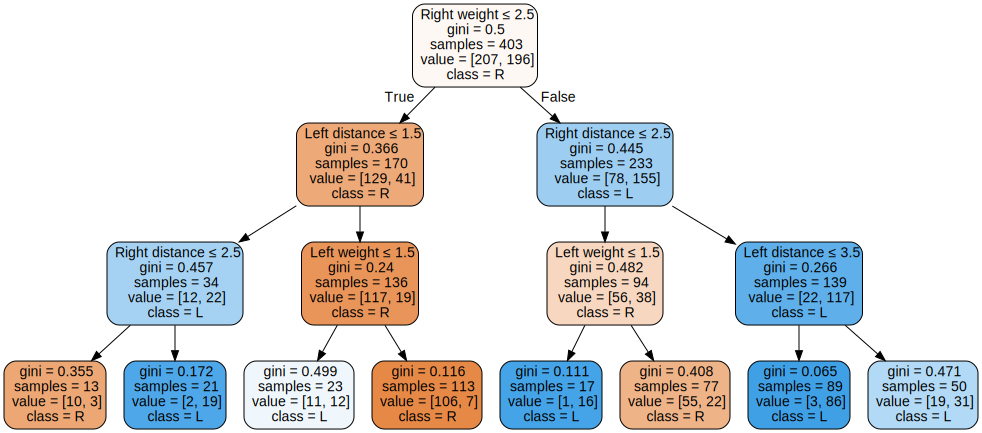

In [54]:
# sacamos el árbol
target = list(df['Class Name'].unique())
feature_names = list(X.columns)

from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 


graph

Podemos **también sacar una representación textual** de los resultados

In [55]:
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- Right weight <= 2.50
|   |--- Left distance <= 1.50
|   |   |--- Right distance <= 2.50
|   |   |   |--- class: L
|   |   |--- Right distance >  2.50
|   |   |   |--- class: R
|   |--- Left distance >  1.50
|   |   |--- Left weight <= 1.50
|   |   |   |--- class: R
|   |   |--- Left weight >  1.50
|   |   |   |--- class: L
|--- Right weight >  2.50
|   |--- Right distance <= 2.50
|   |   |--- Left weight <= 1.50
|   |   |   |--- class: R
|   |   |--- Left weight >  1.50
|   |   |   |--- class: L
|   |--- Right distance >  2.50
|   |   |--- Left distance <= 3.50
|   |   |   |--- class: R
|   |   |--- Left distance >  3.50
|   |   |   |--- class: R



# Ejemplo de aplicación de árboles de decisión para tareas de regresión

Como ya se ha dicho en la parte teórica de la lección, los árboles de decisión también se pueden utilizar para resolver problemas de regresión, es decir, problemas en los que la variable dependiente o target es de tipo numérico continuo.

Comenzamos este apartado con un pequeño ejemplo para irnos familiarizando con esta técnica. 

En primer lugar leemos el fichero de datos:

In [56]:
import pandas as pd

In [57]:
#Descargamos los ficheros de Google Drive
#https://drive.google.com/file/d/1wOqBup1Ir54K9dY8Dcmvov47JEL5ZEY0/view?usp=sharing
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1wOqBup1Ir54K9dY8Dcmvov47JEL5ZEY0' -O 'tennis-time.csv'

--2023-02-12 18:57:28--  https://drive.google.com/uc?export=download&id=1wOqBup1Ir54K9dY8Dcmvov47JEL5ZEY0
Resolving drive.google.com (drive.google.com)... 74.125.197.139, 74.125.197.100, 74.125.197.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mo4gm79jnac00b4gti6f7k5ggo1uilo4/1676228175000/14644984037434537262/*/1wOqBup1Ir54K9dY8Dcmvov47JEL5ZEY0?e=download&uuid=5258ed8e-f519-40bd-9b92-481aafc0e907 [following]
--2023-02-12 18:57:29--  https://doc-10-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mo4gm79jnac00b4gti6f7k5ggo1uilo4/1676228175000/14644984037434537262/*/1wOqBup1Ir54K9dY8Dcmvov47JEL5ZEY0?e=download&uuid=5258ed8e-f519-40bd-9b92-481aafc0e907
Resolving doc-10-b0-docs.googleusercontent.com (doc-10-b0-docs.googleusercontent.com)... 74.125.135.132, 2607:

In [58]:
play_time = pd.read_csv('tennis-time.csv')

In [59]:
# Veamos su contenido
play_time

,outlook,temp,humidity,windy,time
0,sunny,hot,high,False,26
1,sunny,hot,high,True,30
2,overcast,hot,high,False,48
3,rainy,mild,high,False,46
4,rainy,cool,normal,False,62
5,rainy,cool,normal,True,23
6,overcast,cool,normal,True,43
7,sunny,mild,high,False,36
8,sunny,cool,normal,False,38
9,rainy,mild,normal,False,48


Como este procedimiento no admite variables con categorías en formato literal, codificamos las variables features a formato numérico, con la clase de scikit learn LabelEncoder ( tener en cuenta que hubiese sido más procedente utilizar [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), pero se ha optado por utilizar LabelEncoder a fin de que el alumno también vea cómo utilizar este procedimiento).

In [60]:
from sklearn.preprocessing import LabelEncoder
for col in ['outlook','temp','humidity','windy']:
    le = LabelEncoder()
    play_time[col] = le.fit_transform(play_time[col])

In [61]:
# Veamos cómo ha quedado
play_time

,outlook,temp,humidity,windy,time
0,2,1,0,0,26
1,2,1,0,1,30
2,0,1,0,0,48
3,1,2,0,0,46
4,1,0,1,0,62
5,1,0,1,1,23
6,0,0,1,1,43
7,2,2,0,0,36
8,2,0,1,0,38
9,1,2,1,0,48


In [62]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [63]:
dt = DecisionTreeRegressor(max_depth =4, random_state=40)

In [64]:
X= play_time.drop('time',axis=1)
y =  play_time.time

In [65]:
dt.fit( X, y)

DecisionTreeRegressor(max_depth=4, random_state=40)

**NOTA IMPORTANTE:** En el código siguiente se muestra cómo cambiar el tamaño de la imagen cuando usamos graphviz para sacar el árbol de decisión.

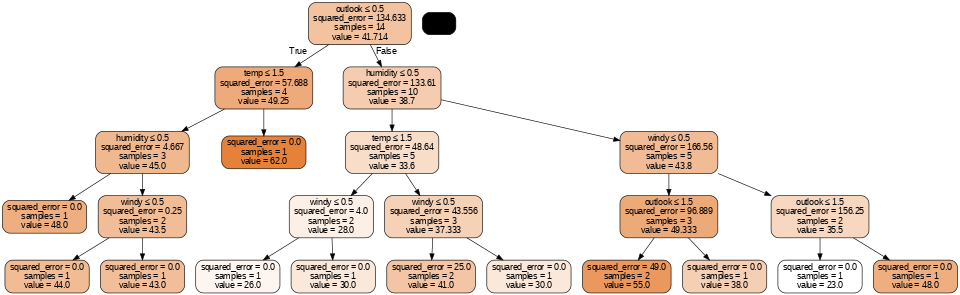

In [66]:
#import graphviz 
from sklearn.tree import  export_graphviz
import pydotplus

dot_data = export_graphviz(dt,out_file=None,
                                feature_names=['outlook','temp','humidity','windy'],
                               class_names = ['time'],
                               filled= True, rounded=True,  
                                special_characters=True
                               )


#graph
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
# Cambiamos el tamaño de la imagen
pydot_graph.set_size('"10,10!"')
image = Image(pydot_graph.create_png())
display(image)

Otra forma de hacer esta representación es empleando la librería [dtreeviz](https://github.com/parrt/dtreeviz). La cual permite obtener una representación visual de los puntos de corte en cada nodo. 

En los ejemplos anteriores ya hemos visto su aplicación para problemas de clasificación. Ahora vamos a estudiar sus funcionalidades para problemas de regresión.

In [67]:
#Si no tenéis instalado la librería dtreeviz descomentad el siguiente comando
#!pip install dtreeviz

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


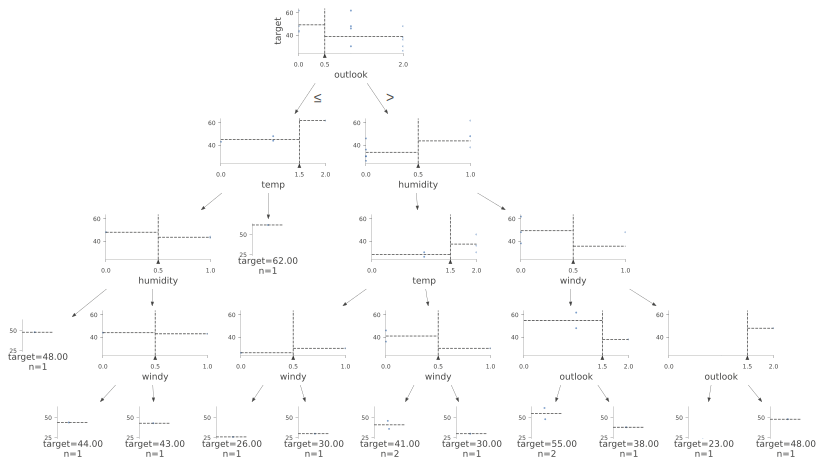

In [68]:
import dtreeviz # remember to load the package

viz = dtreeviz.model(dt, X, y,
                target_name="target",
                feature_names= ['outlook','temp','humidity','windy'])

viz.view()

In [69]:
#Representacion en formato literal
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_1 <= 1.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- value: [48.00]
|   |   |--- feature_2 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- value: [44.00]
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- value: [43.00]
|   |--- feature_1 >  1.50
|   |   |--- value: [62.00]
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- value: [26.00]
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- value: [30.00]
|   |   |--- feature_1 >  1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- value: [41.00]
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- value: [30.00]
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- value: [55.00]
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- value: [38.00]
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_0 <= 1.

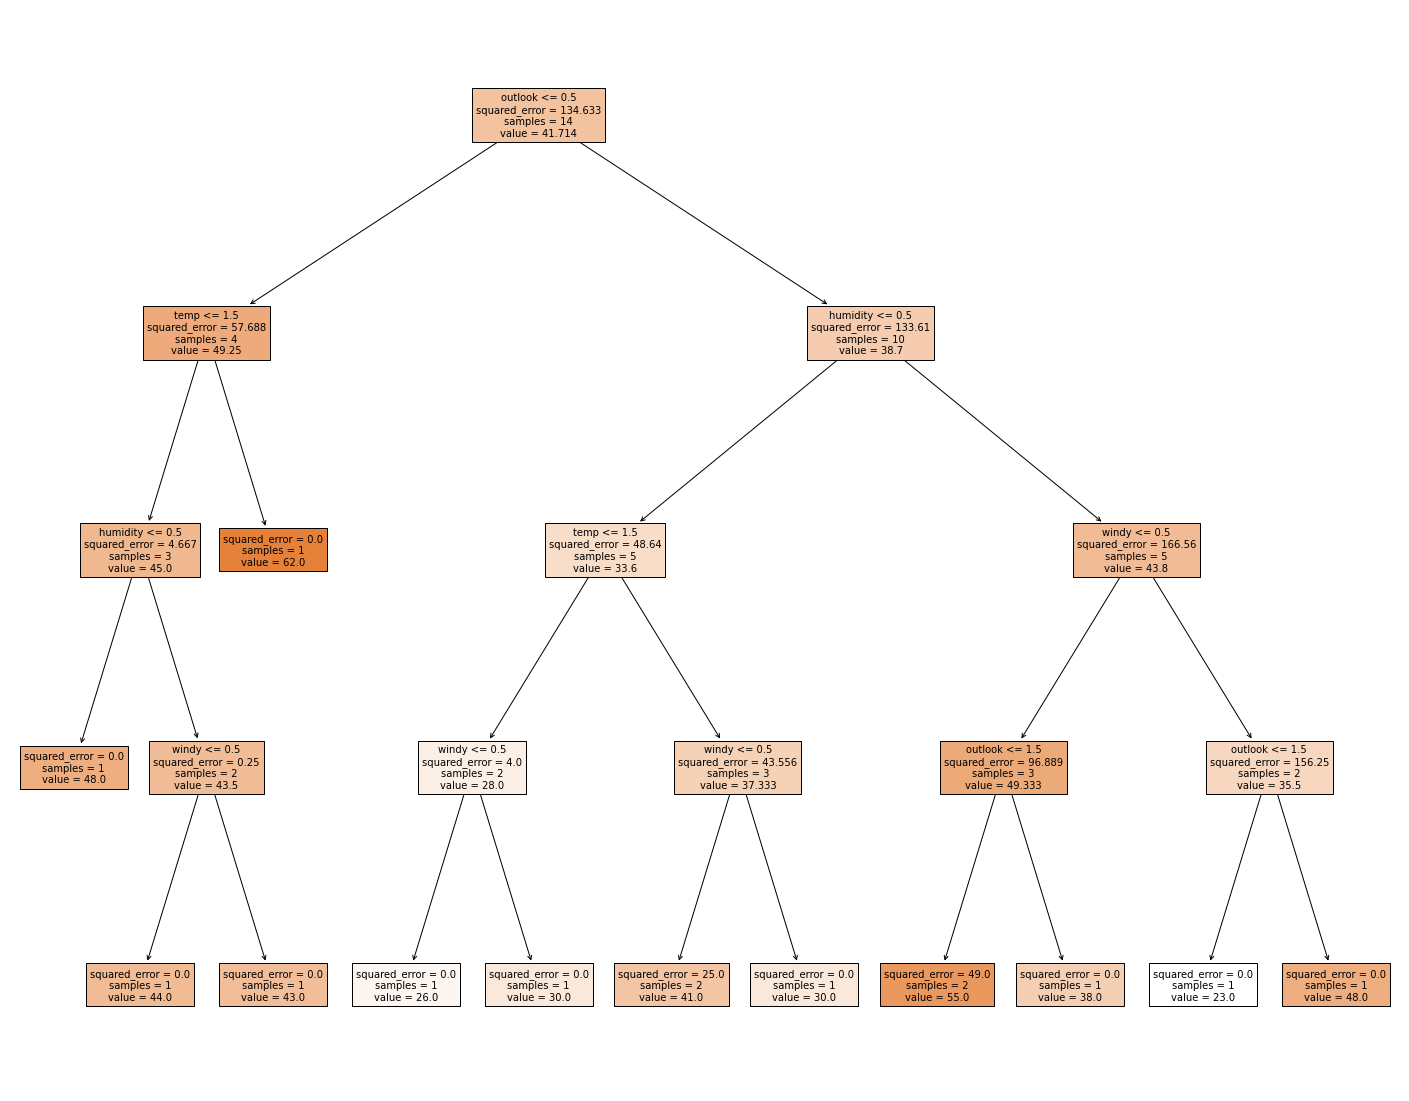

In [70]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names=['outlook','temp','humidity','windy'], filled=True)

A continuación estudiamos la fiabilidad del modelo, que a efectos exclusivamente didácticos, se ha hecho sobre los datos que han entrenado el modelo. Esto normalmente no se hace así, pues realmente se haría sobre los datos de test, pero como en este caso son pocos los datos totales con los que estamos operando no se ha creído oportuno dividir el dataset en datos de entrenamiento y de test.

En el código siguiente, es preciso observar las medidas de ajuste que se obtienen no son las mismas que las utilizadas para los ejemplos anteriores vistos de clasificación, ya que en este caso la variable target es de tipo numérico continuo y por lo tanto para este caso no se pueden aplicar las mismas métricas. Más adelante se explicará el significado de las mismas.

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [72]:

y_pred = dt.predict(X)

print('R^2 score obtenido: {0:.2f}'.format(dt.score(X,y)))
# R^2 mide la varinaza total explicada. Varía entre 0 y 1. 
# 1 indica una predicción perfecta.
print("R^2 = %0.5f" % r2_score(y, y_pred))
# Calculamos mean absolute error
print("MAE = %5.3f" % mean_absolute_error(y, y_pred))
# Calculamos mean squared error
print("MSE = %5.3f" % mean_squared_error(y, y_pred))

R^2 score obtenido: 0.92
R^2 = 0.92148
MAE = 1.714
MSE = 10.571


## Otro ejemplo: Predicción precio casas Boston

Para este apartado se ha elegido un dataset que ya viene preinstalado en `scikit-learn`, se trata del conjunto de datos para la predicción del precio de las casas en Boston. 

Primero cargamos las librerías que nos van a hacer falta y realizamos un breve estudio descriptivo de los datos.

Posteriormente se van a hacer dos tipos de de ajuste:

1.   El primero se va a realizar sin aplicar ninguna transformación a los datos
2.   El segundo se aplicará una transformación del tipo [`TransformedTargetRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html), basado en [`QuantileTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html). 


Información adicional: [Data Pre-Processing with Scikit-Learn](https://medium.datadriveninvestor.com/data-pre-processing-with-scikit-learn-9896c561ef2f)

In [73]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [74]:
# cargamos el conjunto de datos
boston = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Vamos a ver que información contiene el diccionario que hemos cargado y vamos a imprimir alguno de ellos.

In [75]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [76]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [77]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Cargamos los la información contenida en la clave 'data' en un dataframe, pues va a ser la información que emplearemos para ajustar el modelo.

In [78]:
import pandas as pd
import seaborn as sns
datos = pd.DataFrame(boston.data, columns = list(boston.feature_names))
#Añadimos la variable 'PRICES' que contiene los valores a predecir
datos['PRICES'] = boston.target
datos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Estudio descriptivo de los datos

A continuación vamos a estudiar cómo se distribuye cada una de las variables estudiadas. Para ello emplearemos los histogramas.

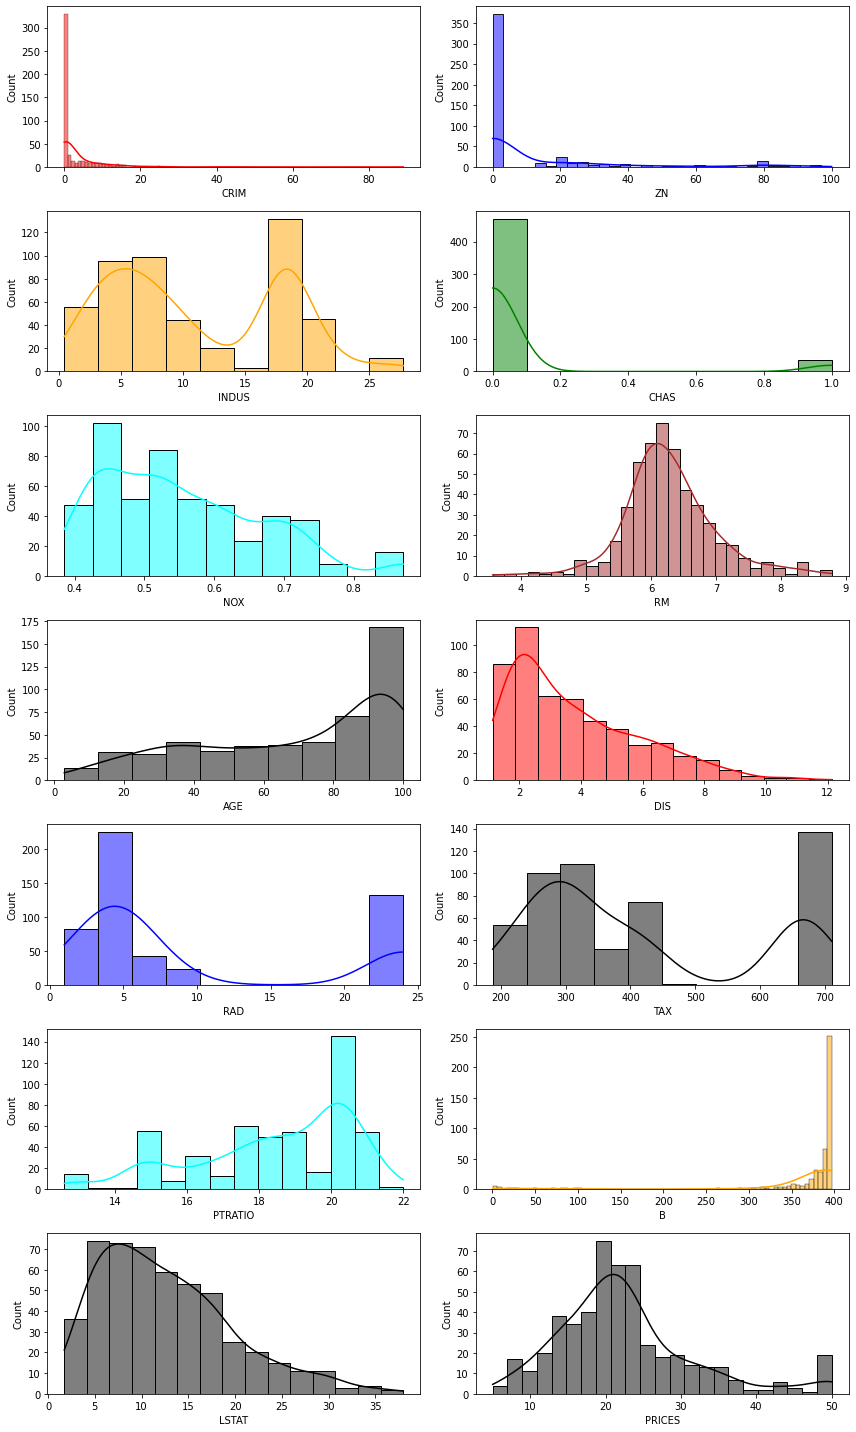

In [79]:
f, axes = plt.subplots(7, 2, figsize=(12, 20))
sns.histplot(datos['CRIM'], color="red", ax=axes[0, 0] , kde=True)
sns.histplot(datos['ZN'], color="blue", ax=axes[0, 1], kde=True)
sns.histplot(datos['INDUS'], color="orange",ax=axes[1, 0], kde=True)
sns.histplot(datos['CHAS'], color="green",ax=axes[1, 1], kde=True)
sns.histplot(datos['NOX'], color="cyan",ax=axes[2, 0], kde=True)
sns.histplot(datos['RM'], color="brown",ax=axes[2, 1], kde=True)
sns.histplot(datos['AGE'], color="black", ax=axes[3, 0], kde=True)

sns.histplot(datos['DIS'], color="red", ax=axes[3, 1], kde=True)
sns.histplot(datos['RAD'], color="blue", ax=axes[4, 0], kde=True)
sns.histplot(datos['TAX'], color="black", ax=axes[4, 1], kde=True)
sns.histplot(datos['PTRATIO'], color="cyan", ax=axes[5, 0], kde=True)
sns.histplot(datos['B'], color="orange", ax=axes[5, 1], kde=True)
sns.histplot(datos['LSTAT'], color="black", ax=axes[6, 0], kde=True)
sns.histplot(datos['PRICES'], color="black", ax=axes[6, 1], kde=True)
plt.tight_layout()

Vemos que cada una de las variables toma rango de valores diferentes, lo que podría sugerirnos una posible normalización de los datos para escalar todos los atributos al mismo rango de valores. Sin embargo, para el caso de los árboles de decisión este preprocesamiento no es necesario, puesto que las reglas que se definen en el entrenamiento son del estiloÇ: "¿es la característica x_i >= algún_val?" Intuitivamente, podemos ver que realmente no importa en qué escala está esta característica.

Veamos ahora como se distribuyen todos los posibles cruces dos a dos de las variables explicativas y de la variable target.

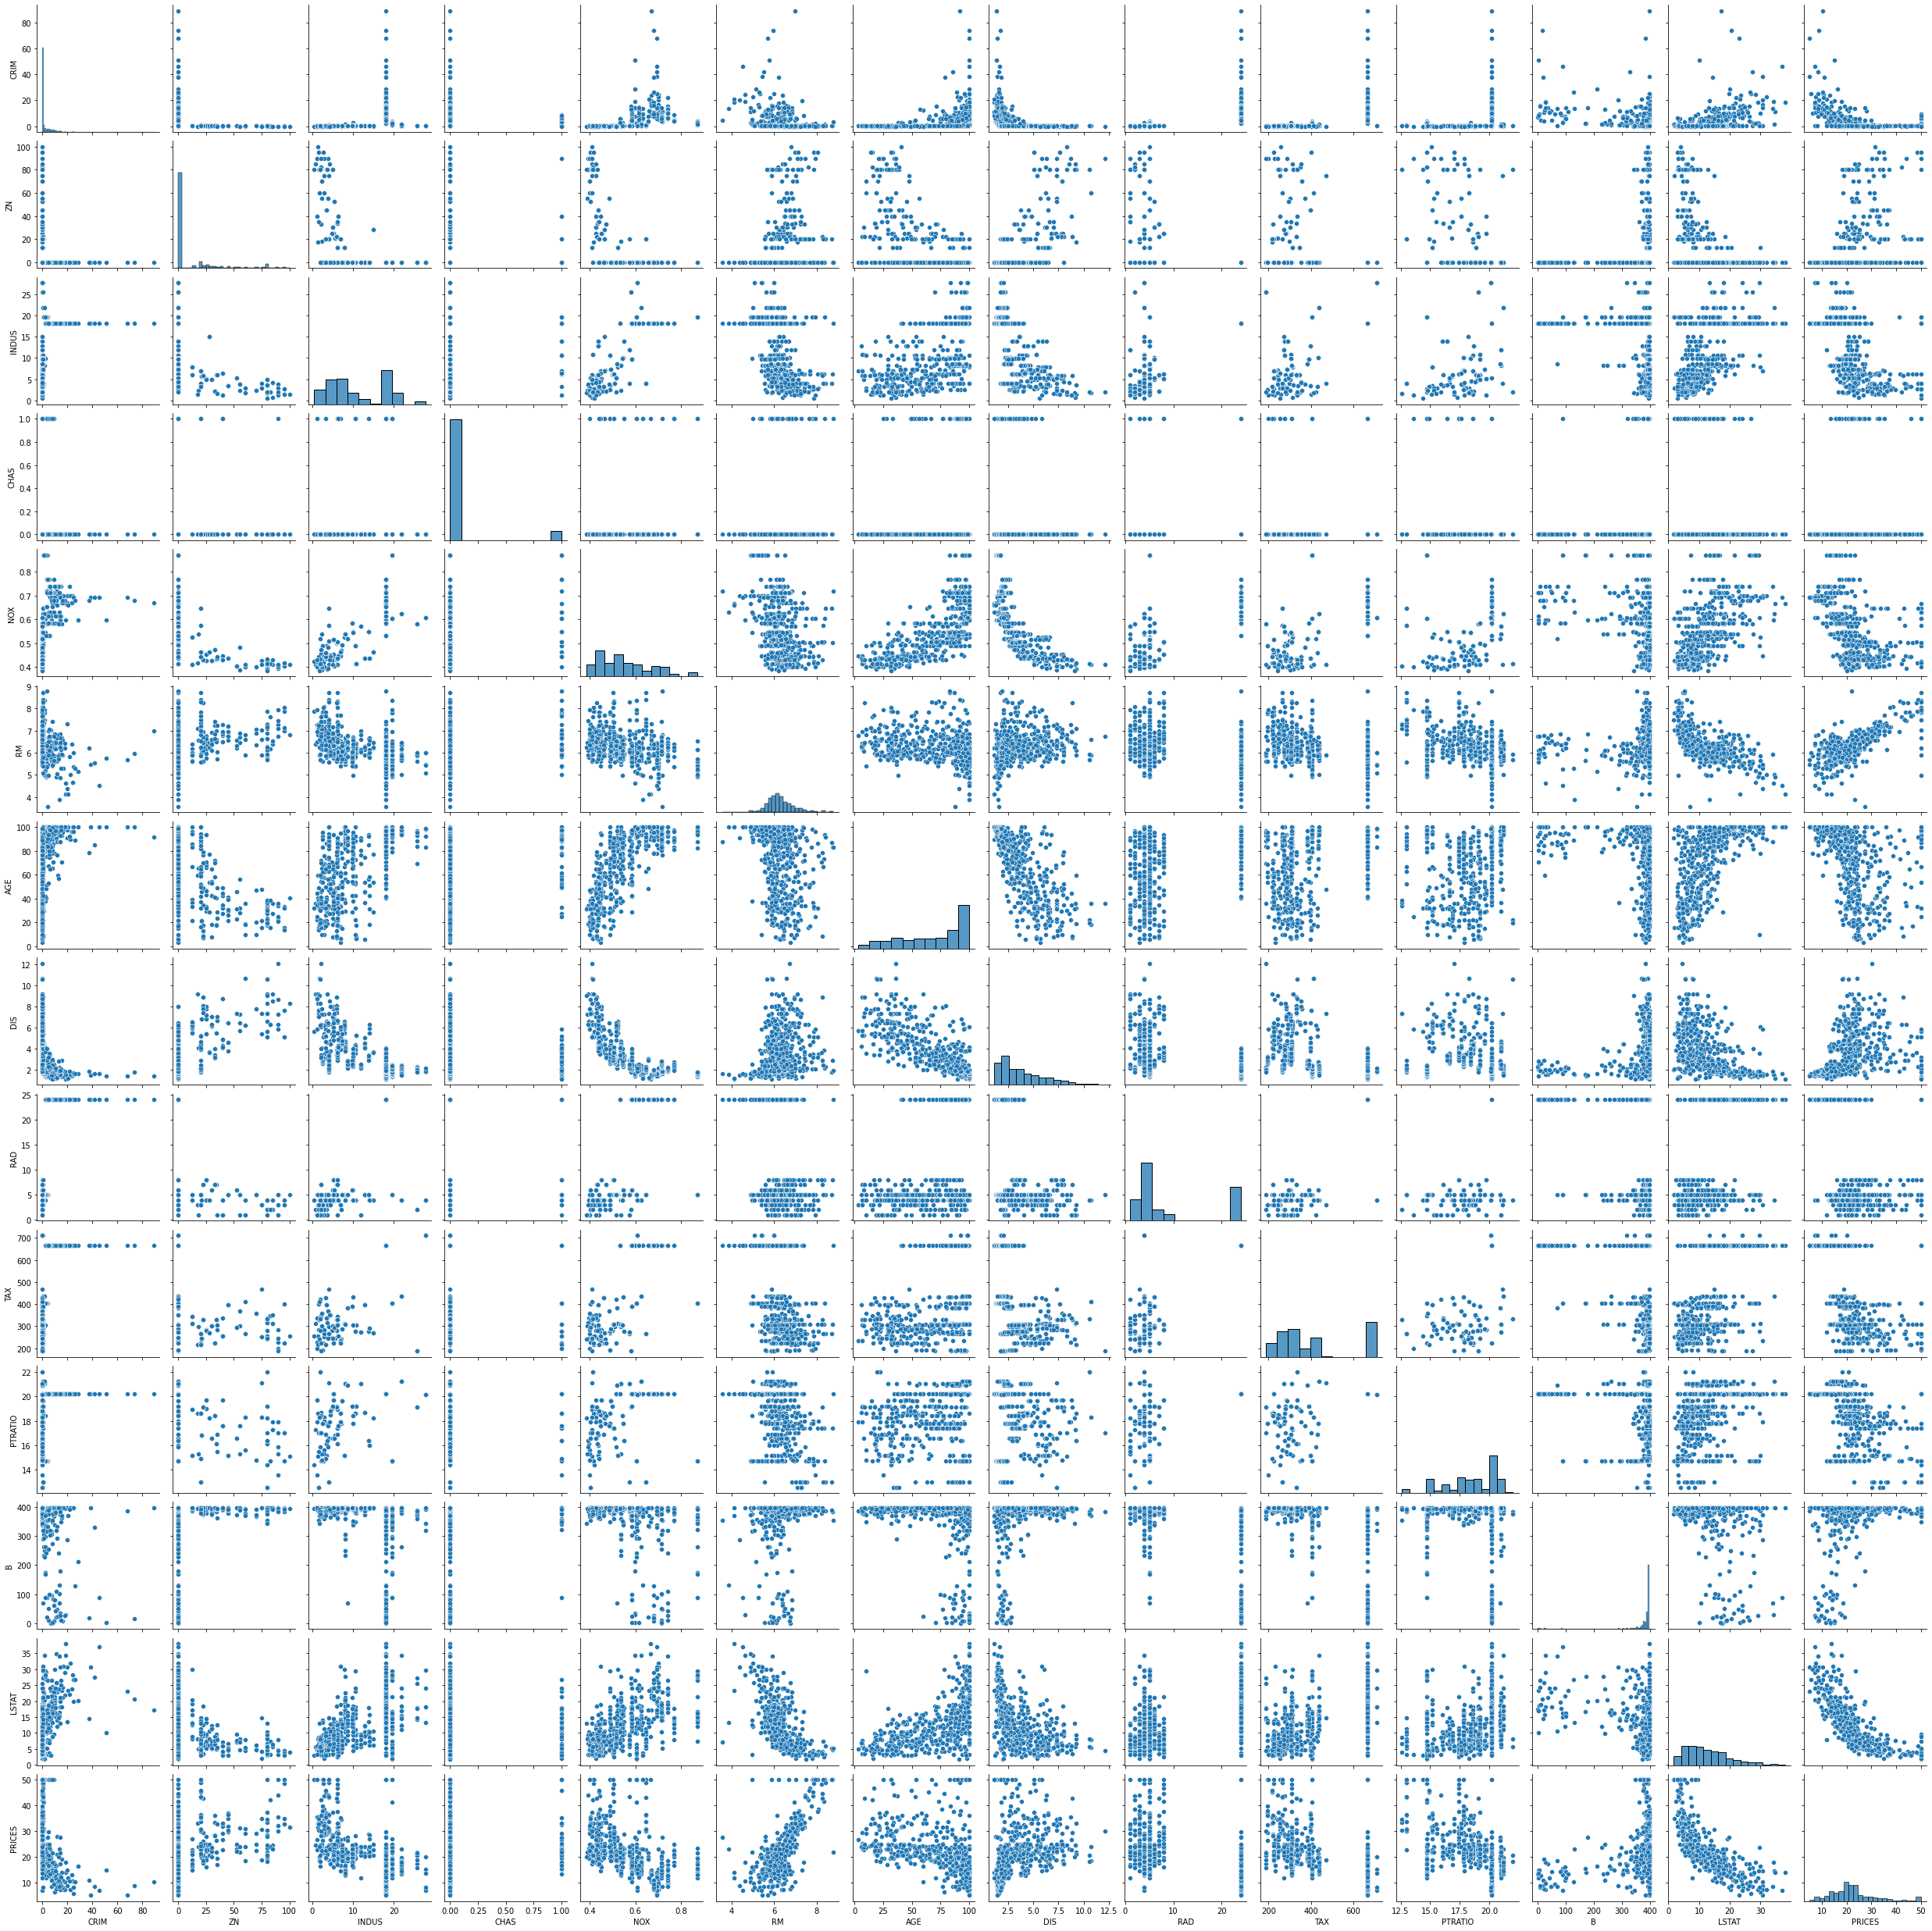

In [80]:
sns.pairplot(datos)
plt.show()

Veamos ahora la correlación que hay entre las variables

In [81]:
datos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Esta matriz anterior, se puede representar de una manera mucho más visual, de forma que nos permita detectar de una forma más intuitiva las variables correladas.

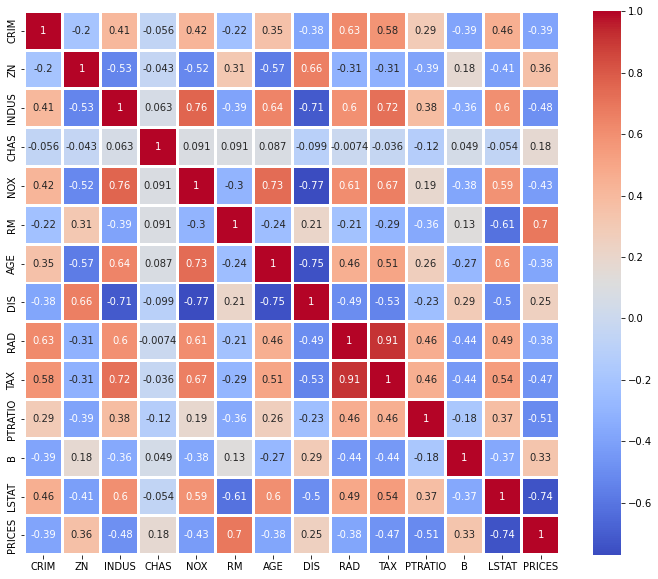

In [82]:
plt.figure(figsize=(12,10))
sns.heatmap(datos.corr(), annot=True, linecolor='white',
linewidths=2, cmap='coolwarm')

Vemos que hay una correlación bastante elevada entre la variable TAX (full-value property-tax rate per $10,000) y la variable RAD (index of accessibility to radial highways). 



Cargamos por un lado las features y por otro la variable objetivo (target), y creamos a continuación los conjuntos de train y test.

In [83]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [84]:
print(len(X_train)) #70% train
print(len(X_test))  #25% test

379
127


### Ajuste sin transformar las features

In [85]:
# Definimos el árbol de decisión para la regresión
regr = DecisionTreeRegressor(random_state = 0)
# Entrenamos el modelo utilizando los datos de train
regr.fit(X_train, y_train)
# Hacemos la predicción utilizando datos de test
y_pred = regr.predict(X_test)

y_pred

array([23.7, 25. , 22.7, 16.3, 22. , 20.4, 20.6, 19. , 15.3, 16.1, 10.5,
       17.9, 12.6,  8.8, 50. , 37. , 21.4, 34.9, 22.8, 19.6, 24.7, 22.3,
       20.1, 24.7, 22.5, 10.9, 14.5, 15.6, 39.8, 18.8, 12.1, 19.1, 25. ,
       22.2, 22. , 22.6, 10.2, 22.6, 12.1, 17.9, 23.9, 23.2, 22. , 11.7,
       26.4, 19. , 22.5, 13.6, 13.8, 27.5, 13.1, 19.7, 24. , 35.2, 13.9,
       18.9, 19.4, 17.6, 10.9, 22.4, 20.6, 22.5, 29.6, 22.8, 23.2, 24. ,
       18.4, 18.9, 10.4, 22.5, 20.8, 22.2, 24.1, 30.1, 25. ,  8.8, 41.7,
       23.1, 22. , 24.5, 27.1, 14.5, 21.4, 37.6, 37.6, 25. , 20.7, 13.8,
       24.4, 16.1, 16.6, 11.8, 20.6, 30.1, 21.1, 23.8, 10.2, 22.9, 12.7,
       18.5, 24.7, 20.1, 30.7, 24.5, 21. , 18.9,  7. , 15.3, 23.9, 22. ,
       37. , 17.9, 18.9, 19.7, 18.9, 20.8,  7.5, 19.2, 10.2, 50. , 30.1,
        6.3, 14.4, 21.4, 25. , 20.5, 36.1])

Ahora vamos a obtener métricas del ajuste realizado. Las más relevantes son las que se muestran a continuación, pero en [este enlace](https://www.dataquest.io/blog/understanding-regression-error-metrics/) podéis encontrar un artículo interesante sobre las diferentes métricas para evaluar el error en un ajuste de regresión y su interpretación gráfica





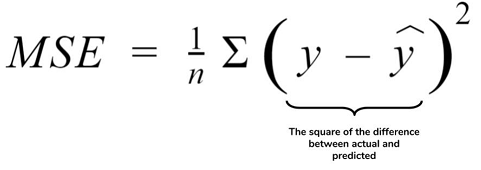

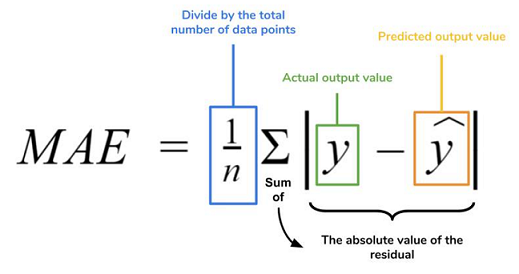

In [86]:
print('R^2 score sin transformación: {0:.3f}'.format(regr.score(X_test, y_test)))
# Varianza explicada: 1  indica predicción perfecta
print("R^2 = %0.3f" % r2_score(y_test, y_pred))
# El valor de absoluto error media
print("MAE = %5.3f" % mean_absolute_error(y_test, y_pred))
#El valor de MSE
print("MSE = %5.3f" % mean_squared_error(y_test, y_pred))



R^2 score sin transformación: 0.658
R^2 = 0.658
MAE = 3.400
MSE = 27.977


Obtenemos un plot que muestre el ajuste existente entre los valores predichos y reales. Una línea recta sería indicador de un ajuste del 100%. Por tanto, **cuanto mejor sea el ajuste obtenido por el árbol de decisión más cerca estarán los puntos sobre esa recta.**

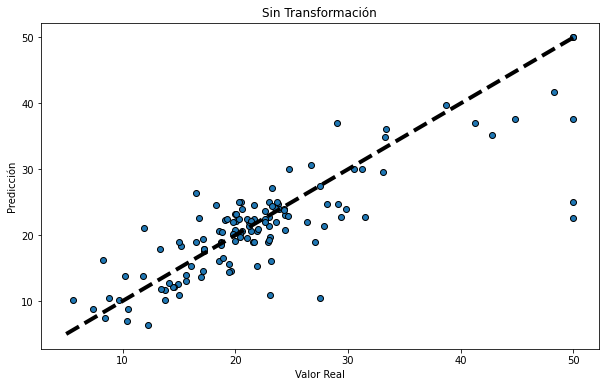

In [87]:
# Sacamos los plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, y_pred, edgecolors = (0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 4)
ax.set_xlabel('Valor Real')
ax.set_ylabel('Predicción')
plt.title('Sin Transformación')
plt.show()

### Mejora del ajuste transformando la variable objetivo

Cuando hacemos un ajuste mediante regresión, existen ocasiones en las que conviene hacer una transformación de la variable dependiente, con la intención de mejorar el ajuste.

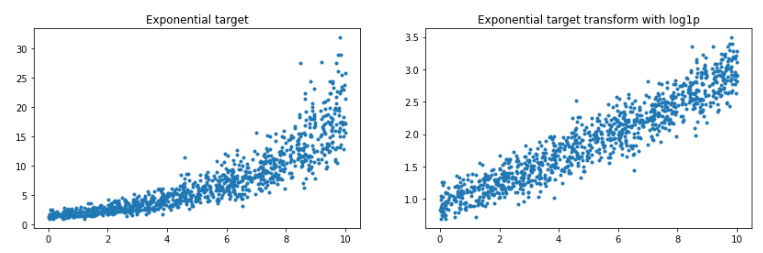

La gráfica de la izquierda representa una función exponencial. Sin embargo, al hacer una transformación de la variable dependiente, vemos que entonces la tendencia es claramente lineal, y el ajuste a una recta mejora sustancialmente.

Por lo tanto, este procedimiento es utilizado en ocasiones para mejorar nuestros datos mediante ajuste de regresión.

Ahora trabajamos con transformación `TransformedTargetRegressor`. Con esta clase lo que hacemos es tranformar la variable target, con la intención de mejorar el ajuste.

In [88]:
#Definimos la transformacion a aplicar a la variable objetivo
transformer = QuantileTransformer(output_distribution = 'normal',n_quantiles=X_train.shape[0] )

In [89]:
#Definimos el modelo
regressor = DecisionTreeRegressor(random_state = 0)
#Aplicamos la transformación definida con QuantileTransformer() a la regresión
regr2 = TransformedTargetRegressor(regressor = regressor, transformer = transformer)

#Dividimos los datos en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Ajustamos el modelo transformando la variable a predecir
regr2.fit(X_train, y_train)

#Obtenemos las predicciones
y_pred = regr2.predict(X_test)

#r^2
print('R^2 score con Transformación: {0:.2f}'.format(regr2.score(X_test,
y_test)))
# Varianza explicada
print("R^2 = %0.5f" % r2_score(y_test, y_pred))
# MAE
print("MAE = %5.3f" % mean_absolute_error(y_test, y_pred))
# MSE
print("MSE = %5.3f" % mean_squared_error(y_test, y_pred))

R^2 score con Transformación: 0.67
R^2 = 0.67239
MAE = 3.209
MSE = 26.766


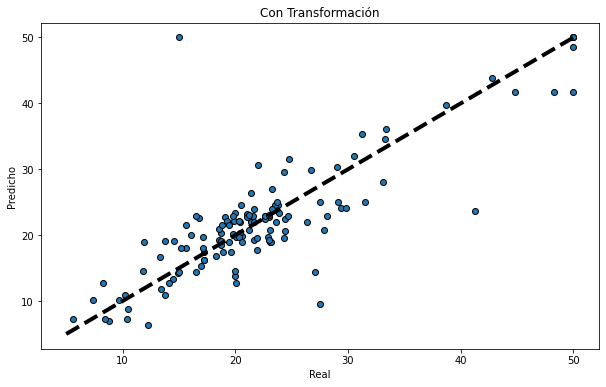

In [90]:
# Sacamos el gráfico
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, y_pred, edgecolors = (0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicho')
plt.title('Con Transformación')
plt.show()

Más información sobre la utilidad de la transformación de la variable dependiente: http://www.xavierdupre.fr/app/mlinsights/helpsphinx/notebooks/sklearn_transformed_target.html

### Representación gráfica del árbol con `dtreeviz`

Dado que el árbol anteriormente entrenado es excesivamente grande como para poder ser interpretado visualmente, vamos a realizar una podda del árbol de decisión, limitando para ello el valor de la profundidad máxima a 2 (`max_depth=2`).

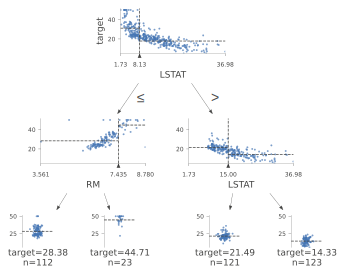

In [92]:
import dtreeviz 
regr = tree.DecisionTreeRegressor(max_depth=2)
regr.fit(X_train, y_train)

viz = dtreeviz.model(regr, X_train, y_train,
                target_name="target",
                feature_names=boston.feature_names)
viz.view()

## Predicción precio casas en Boston un sólo regresor

Veamos un ejemplo con los mismos datos del ejemplo anterior, pero con un sólo regresor, con el fin de apreciar mejor el efecto de una regresión hecha con este procedimiento.

In [93]:
import pandas as pd
from sklearn import datasets

boston = datasets.load_boston()            # Cargamos conjunto de datos
df = pd.DataFrame(boston.data[:, 12])      # creamos DataFrame usando sólo LSAT feature
df.columns = ['LSTAT']
df['MEDV'] = boston.target                 # Creamos una nueva columna como target MEDV
df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


Ahora usamos la implementación de *DecisionTreeRegressor()* de scikit-learn para entrenar el modelo ( ajustamos dos modelos, unos con una profundidad de 3 y otro con una profundidad de 5):

In [94]:
from sklearn.tree import DecisionTreeRegressor    

X = df[['LSTAT']].values                          # asignamos matriz X
y = df['MEDV'].values                             # asignamos matriz y

sort_idx = X.flatten().argsort()                  # ordenamos X e y en orden ascendente de X
X = X[sort_idx]
y = y[sort_idx]

# Ajustamos con una profundidad de 3
tree = DecisionTreeRegressor(criterion='mse',     # Inicializamos y ajustamos el modelo
                             max_depth=3)
# Ajustamos con una profundidad de 5
tree_2= DecisionTreeRegressor(criterion='mse',     # Inicializamos y ajustamos el modelo
                             max_depth=5)

tree.fit(X, y)

tree_2.fit(X,y)


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.


DecisionTreeRegressor(criterion='mse', max_depth=5)

Se puede comprobar que el criterio utilizado es diferente al que se utiliza para construir árbol de clasificación. La entropía como medida de impureza es un criterio útil para la clasificación. Sin embargo, para utilizar un árbol de decisión para la regresión, necesitamos una métrica de impureza que sea adecuada para las variables continuas, por lo que se define la medida de impureza utilizando el error cuadrático medio ponderado (MSE) de los nodos hijos:

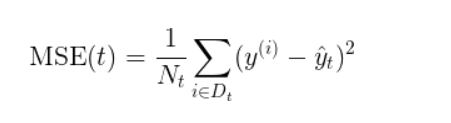

En esta fórmula, Nt es el número de muestras en el training en el nodo t, Dt es el subconjunto de entrenamiento en el nodo t, y(i) es el valor verdadero de la variable target, y $\hat{y_t}$ es el valor predicho (media muestral).

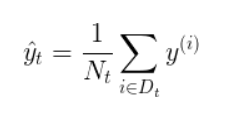

### Profundidad máxima de 3.

Ahora, vamos a modelar la relación entre el MEDV y el LSTAT para ver cómo es el ajuste de la línea de un árbol de regresión.

Inicialmente procedemos a representar para el primer modelo ( profundidad de 3).

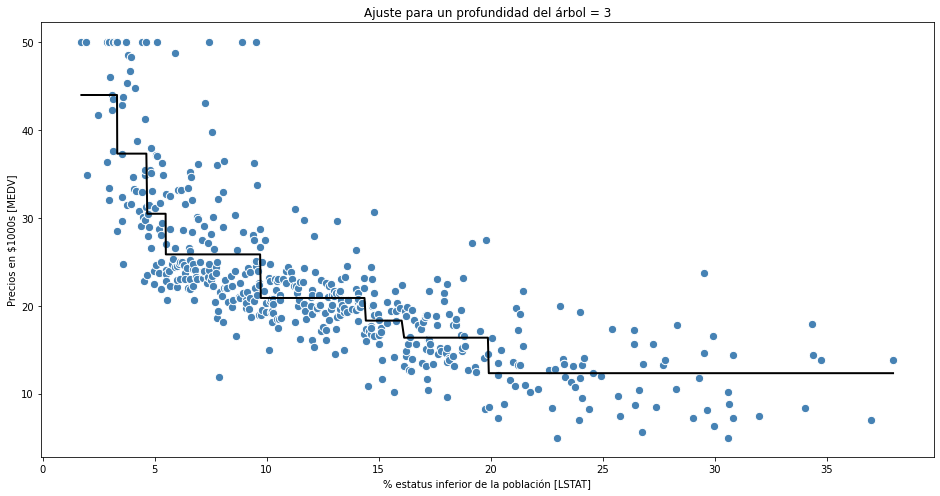

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',                  # Plot actual target against features
            edgecolor='white', s=70)
plt.plot(X, tree.predict(X),                      # Plot predicted target against features
         color='black', lw=2)
plt.xlabel('% estatus inferior de la población [LSTAT]')
plt.ylabel('Precios en $1000s [MEDV]')
plt.title("Ajuste para un profundidad del árbol = 3")
plt.show()

Como podemos ver en el gráfico resultante, el árbol de decisión de profundidad 3 captura la tendencia general de los datos.

### Profundidad máxima de 5.

A continuación realizamos el ajuste para una profundidad e 5.



En la práctica, es importante saber cómo elegir un valor apropiado para la profundidad de un árbol para no sobreajustar (overfit) o infraajustar (underfit) los datos. Como puede verse en la siguiente figura en la que se ha hecho un ajuste para una profundidad de 5, la curva de regresión se ajusta mucho más a los datos de entrenamiento, lo que implica un aumento considerable del riesgo de sobreajuste, es decir, es muy probable que nuestro modelo se esté ajustando en exceso a los datos de prueba, pero que no sirva para hacer predicciones con nuevos datos y, por lo tanto, se cometa mayor error en las ellas.

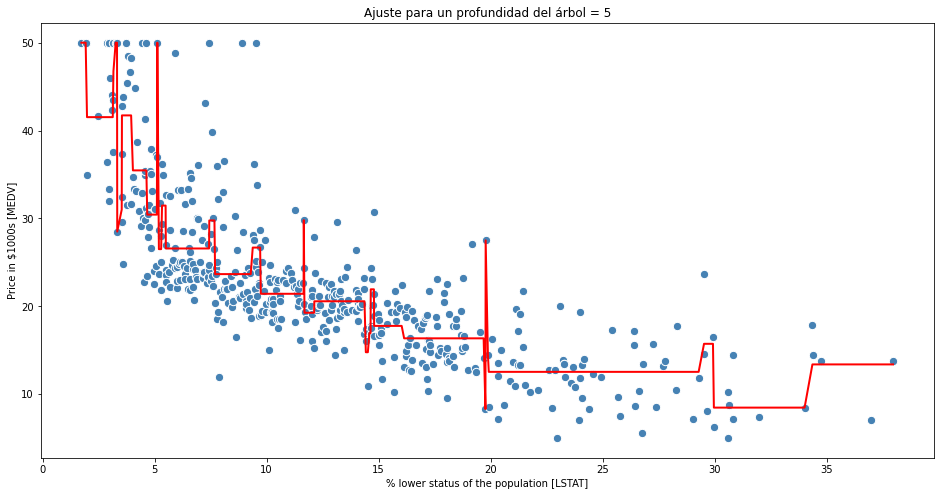

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',                  # Plot actual target against features
            edgecolor='white', s=70)
plt.plot(X, tree_2.predict(X),                      # Plot predicted target against features
         color='red', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.title("Ajuste para un profundidad del árbol = 5")
plt.show()